# Procesamiento de lenguaje natural - NLP

En este notebook veremos algunos conceptos fundamentales en el procesamiento de lenguaje natural, como son:
* Tokenization
* Vectorización
  * Encoding
  * Embedding
* RNN 

También haremos un práctica donde aplicaremos distintos métodos para resolver un problema de clasificación binario, donde las variables de entrada en este caso serán palabras.

In [3]:
!nvdia sbmi

/bin/bash: nvdia: command not found




---



# Fundamentos

Convertir texto en un conjunto de valores numericos que sean representativos, es una necesidad muy habitual cuando hacemos ingeniería de características `feature engineering`. 

Una forma sencilla de codificar datos es `contando palabras`: literal contamos la ocurrencia de una palabra en una oración, y con esto sabemos su frecuencia.

In [5]:
ejemplo = ['la inteligencia artificial es buena',
           'que buena inteligencia tiene tu perro',
           'buena tu perro es artificial']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(ejemplo)
X.toarray()

array([[1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 0, 0, 1]])

In [8]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,artificial,buena,es,inteligencia,la,perro,que,tiene,tu
0,1,1,1,1,1,0,0,0,0
1,0,1,0,1,0,1,1,1,1
2,1,1,1,0,0,1,0,0,1


In [9]:
ejemplo_2 = ['La gravedad de un agujero negro, o «curvatura del espacio-tiempo», provoca una singularidad envuelta por una superficie cerrada, llamada horizonte de sucesos.',
             'Esto es previsto por las ecuaciones del campo de Einstein.',
             'El horizonte de sucesos separa la región del agujero negro del resto del universo, y una vez dentro de él, ningún tipo de partícula, sea material o electromagnética, puede salir, ni siquiera los fotones.',
             'Dicha curvatura es estudiada por la relatividad general, la que predijo la existencia de los agujeros negros y fue su primer indicio.',
             'En la década de 1970, Stephen Hawking, Ellis y Penrose demostraron varios teoremas importantes sobre la ocurrencia y geometría de los agujeros negros.'
             '​Previamente, en 1963, Roy Kerr había demostrado que en un espacio-tiempo de cuatro dimensiones todos los agujeros negros debían tener una geometría cuasiesférica determinada por tres parámetros: su masa M, su carga eléctrica total e y su momento angular L.']

In [10]:
vec = CountVectorizer()
X = vec.fit_transform(ejemplo_2)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,1963,1970,agujero,agujeros,angular,campo,carga,cerrada,cuasiesférica,cuatro,...,tipo,todos,total,tres,un,una,universo,varios,vez,él
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,2,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,2,1,0,1,0,1,1,...,0,1,1,1,1,1,0,1,0,0


Este simple proceso de contar cuantas veces ocurre una palabra en una sentencia u oración, tiene alguno problemas, como por ejemplo poner demasiado peso en palabras que aparezca muy frecuente, lo cual en algunos algoritmos no es beneficioso.

Una forma de solucionar esto es usando `term frequency-inverse document frequency (TF-IDF)`, donde el conteo de palabras está ponderado por una medida de la frecuencia con la que aparecen en los documentos

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfVectorizer
tfvec = TfidfVectorizer()
X = tfvec.fit_transform(ejemplo)
pd.DataFrame(X.toarray(), columns=tfvec.get_feature_names_out())

,artificial,buena,es,inteligencia,la,perro,que,tiene,tu
0,0.433067,0.336315,0.433067,0.433067,0.569431,0.000000,0.00000,0.00000,0.000000
1,0.000000,0.292254,0.000000,0.376331,0.000000,0.376331,0.49483,0.49483,0.376331
2,0.466096,0.361965,0.466096,0.000000,0.000000,0.466096,0.00000,0.00000,0.466096


Esto tambien lo podemos lograr usando `TensorFlow` con sus capas de [Vectorización](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) y [Embedding](https://www.tensorflow.org/text/guide/word_embeddings)

In [13]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [14]:
# Usamos el mismo ejemplo para tokenizar y vectorizar con TensorFlow
ejemplo = [' la inteligencia artificial es buena',
           'que buena inteligencia tiene tu perro',
           'buena tu perro es artificial']

In [15]:
# Tokenización por palabras significa generar tokens individuales de la siguiente manera
[i.split() for i in ejemplo]

[['la', 'inteligencia', 'artificial', 'es', 'buena'],
 ['que', 'buena', 'inteligencia', 'tiene', 'tu', 'perro'],
 ['buena', 'tu', 'perro', 'es', 'artificial']]

In [16]:
# Calculamos el valor promedio de tokens (palabras) en el ejemplo
round(sum([len(i.split()) for i in ejemplo])/len(ejemplo))

5

In [17]:
text_vec = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = 10000,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None, #esto sirve para generar bigramas o más n conjuntos de palabras.
    output_mode='int',
    output_sequence_length = 5)

In [18]:
text_vec.adapt(ejemplo)
text_vec(ejemplo)

<tf.Tensor: shape=(3, 5), dtype=int64, numpy=
array([[10,  5,  7,  6,  2],
       [ 9,  2,  5,  8,  3],
       [ 2,  3,  4,  6,  7]])>

In [19]:
text_vec = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = 10000,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='count')

In [20]:
text_vec.adapt(ejemplo)
text_vec(ejemplo)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 1., 1., 1., 0., 0., 1.],
       [0., 1., 1., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 0., 1., 1., 0., 0., 0.]], dtype=float32)>

In [23]:
text_vec.get_vocabulary()

['[UNK]',
 'buena',
 'tu',
 'perro',
 'inteligencia',
 'es',
 'artificial',
 'tiene',
 'que',
 'la']

In [21]:
text_vec = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=10000,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='tf-idf')

In [22]:
text_vec.adapt(ejemplo)
text_vec(ejemplo)

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.        , 0.5596158 , 0.        , 0.        , 0.6931472 ,
        0.6931472 , 0.6931472 , 0.        , 0.        , 0.91629076],
       [0.        , 0.5596158 , 0.6931472 , 0.6931472 , 0.6931472 ,
        0.        , 0.        , 0.91629076, 0.91629076, 0.        ],
       [0.        , 0.5596158 , 0.6931472 , 0.6931472 , 0.        ,
        0.6931472 , 0.6931472 , 0.        , 0.        , 0.        ]],
      dtype=float32)>

In [24]:
text_vec.get_vocabulary()

['[UNK]',
 'buena',
 'tu',
 'perro',
 'inteligencia',
 'es',
 'artificial',
 'tiene',
 'que',
 'la']

In [25]:
# Embedding un vocabulario de 5 palabras promedio en 10000 dimensiones con 128 de longitud.
embedding = tf.keras.layers.Embedding(input_dim = 10000, #el tamaño del vocabulario (en este caso está exagerado a 10000)
                                      output_dim = 128, #128 significa que cada token va a estar representado en un vector de longitud 128
                                      input_length = 10) #Esto en el caso de vectorizacion con 'count' o 'tf-idf' no es necesario definir ya que lo saca de la misma dimension
embedding

In [26]:
result = embedding(text_vec(ejemplo))
result.shape

TensorShape([3, 10, 128])



---



# Caso práctico 

En este práctico veremos de realizar un ejercicio sencillo de clasificador de mails en `spam` y `ham` (no spam). 

Para esto usaremos un dataset de un repositorio en github.

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
data = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data.shape

(5572, 2)

In [31]:
clases = data['class'].unique()
clases

array(['ham', 'spam'], dtype=object)

In [32]:
data['message'][:10]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: message, dtype: object

In [33]:
#Limpiamos de carácteres especiales
spec_chars = ["!",'"',"#","%","&","'","(",")",
"*","+",",","-",".","/",":",";","<",
"=",">","?","@","[","\\","]","^","_",
"`","{","|","}","~","–","€","!","¡"]
for char in spec_chars:
	data['message'] = data['message'].str.replace(char, ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [34]:
data['class'] = data['class'].map({'ham':0,'spam':1})

In [35]:
data['class'].value_counts()

0    4825
1     747
Name: class, dtype: int64

In [36]:
X = data['message'].str.lower().to_numpy()
y = data['class'].to_numpy()

In [37]:
X[:3]

array(['go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   ',
       'ok lar    joking wif u oni   ',
       'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s'],
      dtype=object)

In [38]:
y[:3]

array([0, 0, 1])

(array([4825.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

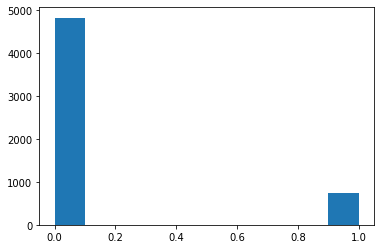

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(y)

## Separamos dataset en train y test

In [40]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)
print(f"Train set shape: {xtrain.shape}, {ytrain.shape}")
print(f"Test set shape: {xtest.shape}, {ytest.shape}")

Train set shape: (4179,), (4179,)
Test set shape: (1393,), (1393,)




---



## Modelamos un dataset de texto (probamos varios experimentos)

Una vez que tenemos los datos preparados lo siguiente será correr una serie de entrenamientos probando diferentes enfoques.

Empezaremos con un modelo base y de ahí trataremos de mejorar metricas.

* Modelo 0: Naive Bayes (baseline)
* Modelo 1: Feed-foward neural network (dense model)
* Modelo 2: LSTM model (RNN)
* Modelo 3: 1D Convolutional Neural Network (CNN)
* Modelo 4: Tensorflow Hub Pretrained Feature Extractor (usamos transfer learning para NLP)

Todos estos modelos los entrenaremos con la metodología de cualquier modelo de machine learning. 

Usaremos los pasos estandar en el modelado con TensorFlow:
* Creamos un modelo.
* Compilamos el modelo (optimizadores, función de pérdida y métricas).
* Entrenamos el modelo.
* Evaluamos el modelo.

### Naive Bayes model

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer()),
                    ("clf",MultinomialNB())
])
model_0.fit(xtrain,ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [42]:
#Creamos una función para evaluar los modelos
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  model_accuracy = accuracy_score(y_true,y_pred)
  model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1":model_f1}
  return model_results  

In [43]:
y_naive_pred = model_0.predict(xtest)
naive_metrics = calculate_results(ytest, y_naive_pred)
naive_metrics

{'accuracy': 0.9569274946159368,
 'precision': 0.9589688455820061,
 'recall': 0.9569274946159368,
 'f1': 0.9533350116750702}

### Feed Fowardv (dnn) model

En TensorFlow existe todo un modulo de preprocesamiento de datos, tanto desde la optimización del calculo del costo usando mini-batch SGD, así cómo la optimización en memoria usando pre-carga de datos (prefetch).

Para esto preprocesamos el dataset para que sea más eficiente con `tf.data.Dataset`. Para mas información les dejo el [link](https://www.tensorflow.org/guide/data)

In [44]:
#Realizamos un pequeño pre-procesado de datos que optimizará recursos y tiempo

train_dataset = tf.data.Dataset.from_tensor_slices((xtrain,ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest))

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

Deberemos instanciar previamente las capas de `TextVectorization` y `Embedding` para setearlas y solamente llamarlas desde la arquitectura durante el entrenamiento, testeo y predicción.

In [45]:
# Buscamos la cantidad promedio de tokens (palabras)
round(sum([len(i.split()) for i in xtrain])/len(xtrain))

16

In [46]:
max_vocab_length = 10000 # Tamaño máximo de vocabulario. Por lo general se usa 5000 o 10000 para asegurarnos de que no quede ninguna palabra afuera
max_length = 16 # Longitud de secuencia de palabras por oración
text_vec = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=max_vocab_length,
                                                                               output_mode='int',
                                                                               output_sequence_length=max_length)
text_vec.adapt(xtrain)

In [47]:
embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                      output_dim = 128,
                                      input_length=max_length)
embedding

Construimos la arquitectura de red neuronal profunda, con las capas respectivas de vectorización y embedding.

In [48]:
# 1.Contruimos un modelo usando la API Functional de TensorFlow
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string) #tener en cuenta que define el dtype -> tf.string
x = text_vec(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs)
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 16)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 16, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

In [52]:
import time
start = time.time()
# 2.Compilamos el modelo
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 3.Entrenamos el modelo
history_1=model_1.fit(train_dataset,
                      epochs=10,
                      validation_data=(test_dataset),
                      callbacks=[tf.keras.callbacks.ModelCheckpoint('checkpoints/model_1_dense',save_best_only=True)])
print(f"Time: {start - time.time()}")

Epoch 1/10
131/131 [==============================] - 2s 13ms/step - loss: 5.6132e-04 - accuracy: 0.9998 - val_loss: 0.0917 - val_accuracy: 0.9813
Epoch 2/10
131/131 [==============================] - 1s 5ms/step - loss: 5.3768e-05 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.9821
Epoch 3/10
131/131 [==============================] - 1s 5ms/step - loss: 2.9282e-05 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9821
Epoch 4/10
131/131 [==============================] - 1s 5ms/step - loss: 2.0555e-05 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.9821
Epoch 5/10
131/131 [==============================] - 1s 5ms/step - loss: 1.5342e-05 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9821
Epoch 6/10
131/131 [==============================] - 1s 5ms/step - loss: 1.1949e-05 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9821
Epoch 7/10
131/131 [==============================] - 1s 5ms/step - loss: 9.5827e-06 - accuracy: 1.0000 - val_loss: 0.1147 

In [53]:
y_dense_pred = model_1.predict(xtest)
y_dense_pred = tf.round(tf.squeeze(y_dense_pred)).numpy()
y_dense_pred

44/44 [==============================] - 0s 2ms/step


array([0., 1., 0., ..., 1., 0., 0.], dtype=float32)

In [54]:
dense_metrics = calculate_results(ytest, y_dense_pred)
dense_metrics

{'accuracy': 0.9813352476669059,
 'precision': 0.9811967859484276,
 'recall': 0.9813352476669059,
 'f1': 0.9809796565895357}

### Recurrent Neural Networks (RNN's) - LSTM model

Las RNN son utiles para secuencia de datos.

La premisa de la rnn es utilizar la representación de una entrada anterior para ayudar a la representación de una entrada posterior.

>**Recursos:**
- MIT lectura de modelos secuenciales: https://www.youtube.com/watch?v=qjrad0V0uJE&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3
- Understanding LSTM: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- The unreasonable effectiveness of recurrent neural network: http://karpathy.github.io/2015/05/21/rnn-effectiveness/


LSTM = long short term memory

La estructura de una arquitectura RNN luce así:
> Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability) 

In [55]:
# Create and LSTM model
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = text_vec(inputs)
x = embedding(x)
print(x.shape)
x = tf.keras.layers.LSTM(64, return_sequences=True)(x) #serie time
print(x.shape)
x = tf.keras.layers.LSTM(64)(x)
print(x.shape)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs)

(None, 16, 128)
(None, 16, 64)
(None, 64)


In [56]:
# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [57]:
import time
start = time.time()
history_2 = model_2.fit(xtrain,ytrain,
                        epochs=5,
                        validation_data=(xtest,ytest),
                        callbacks=[tf.keras.callbacks.ModelCheckpoint('checkpoints/model_2_rnn',save_best_only=True)])
print(f"Time: {start - time.time()}")

Epoch 1/5
126/131 [===========================>..] - ETA: 0s - loss: 0.0661 - accuracy: 0.9774

131/131 [==============================] - 15s 75ms/step - loss: 0.0638 - accuracy: 0.9782 - val_loss: 0.0795 - val_accuracy: 0.9806
Epoch 2/5
131/131 [==============================] - 1s 9ms/step - loss: 6.6502e-04 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9806
Epoch 3/5
131/131 [==============================] - 1s 9ms/step - loss: 2.0553e-04 - accuracy: 1.0000 - val_loss: 0.1140 - val_accuracy: 0.9806
Epoch 4/5
131/131 [==============================] - 1s 9ms/step - loss: 1.2063e-04 - accuracy: 1.0000 - val_loss: 0.1231 - val_accuracy: 0.9799
Epoch 5/5
131/131 [==============================] - 1s 9ms/step - loss: 8.1508e-05 - accuracy: 1.0000 - val_loss: 0.1305 - val_accuracy: 0.9799
Time: -23.267467498779297


In [58]:
y_lstm_pred = model_2.predict(xtest)
y_lstm_pred = tf.round(tf.squeeze(y_lstm_pred)).numpy()
y_lstm_pred

44/44 [==============================] - 1s 4ms/step


array([0., 1., 0., ..., 1., 0., 0.], dtype=float32)

In [59]:
lstm_metrics = calculate_results(ytest, y_lstm_pred)
lstm_metrics

{'accuracy': 0.9798994974874372,
 'precision': 0.9796471449435777,
 'recall': 0.9798994974874372,
 'f1': 0.9796160937063195}

### CNN - 1D model

In [62]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,),dtype=tf.string),
    text_vec,
    embedding,
    tf.keras.layers.Conv1D(64,5,padding='same',activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (TextV  (None, 16)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 16, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 64)            41024     
                                                                 
 global_average_pooling1d_3   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                

In [63]:
model_3.fit(train_dataset,
          epochs=10,
          batch_size=128,
          validation_data=test_dataset,
          callbacks=[tf.keras.callbacks.ModelCheckpoint('checkpoints/model_3_cnn',
											save_best_only=True)])

Epoch 1/10
131/131 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9957

131/131 [==============================] - 7s 17ms/step - loss: 0.0648 - accuracy: 0.9957 - val_loss: 0.0607 - val_accuracy: 0.9842
Epoch 2/10
131/131 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0717 - val_accuracy: 0.9828
Epoch 3/10
131/131 [==============================] - 1s 5ms/step - loss: 2.9044e-04 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9835
Epoch 4/10
131/131 [==============================] - 1s 5ms/step - loss: 1.2419e-04 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9835
Epoch 5/10
131/131 [==============================] - 1s 5ms/step - loss: 7.6007e-05 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9842
Epoch 6/10
131/131 [==============================] - 1s 5ms/step - loss: 5.1333e-05 - accuracy: 1.0000 - val_loss: 0.0900 - val_accuracy: 0.9842
Epoch 7/10
131/131 [==============================] - 1s 5ms/step - loss: 3.6849e-05 - accuracy: 1.0000 - val_loss: 0.0930 - val_accuracy: 0.9

In [64]:
y_cnn_pred = model_3.predict(xtest)
y_cnn_pred = tf.round(tf.squeeze(y_cnn_pred)).numpy()
y_cnn_pred

44/44 [==============================] - 0s 2ms/step


array([0., 1., 0., ..., 1., 0., 0.], dtype=float32)

In [65]:
cnn_metrics = calculate_results(ytest, y_cnn_pred)
cnn_metrics

{'accuracy': 0.9842067480258435,
 'precision': 0.9841226546698376,
 'recall': 0.9842067480258435,
 'f1': 0.9839452269920772}

## Evaluamos los modelos

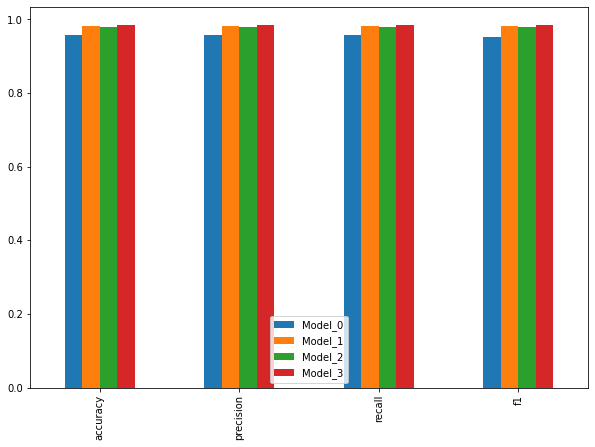

In [66]:
models_results = pd.DataFrame({"Model_0":naive_metrics,
                               "Model_1":dense_metrics,
                               "Model_2":lstm_metrics,
                               "Model_3":cnn_metrics})
models_results.plot(kind='bar',figsize=(10,7)).legend()

# Ajustes 🛠️
Una vez obtenidas las metricas comparativas de los diferentes modelos, podemos intentar varias cosas para mejorar en cada caso la performance de las redes neuronales recurrentes o convolucionales.

Para esto podemos ajustar:
* La cantidad de unidades/neuronas en cada capa recurrente.
* Ajustar el valor de learning rate o establecer un callback para esto `tf.keras.callbacks.ReduceLRonPlateu(patience=3)`
* Cambiar las celdas LSTM por GRU: `tf.keras.layers.GRU(64, return_sequences=True)`
* Tratar de implementar una red profunda más grande en la parte de la regresión final. 



---



> **Extras:** 
1. https://projector.tensorflow.org/
2. https://www.tensorflow.org/tutorials/keras/text_classification
3. https://www.tensorflow.org/text/guide/word_embeddings
4. https://www.tensorflow.org/text/tutorials/text_classification_rnn


In [68]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,),dtype=tf.string),
    text_vec,
    embedding,
    tf.keras.layers.GRU(64,return_sequences=True),
    tf.keras.layers.GRU(64,return_sequences=False),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_5.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
model_5.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (TextV  (None, 16)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 16, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 16, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                      

In [69]:
model_5.fit(train_dataset,
            epochs=5,
            validation_data=test_dataset)

Epoch 1/5
131/131 [==============================] - 5s 13ms/step - loss: 0.0485 - accuracy: 0.9861 - val_loss: 0.0852 - val_accuracy: 0.9777
Epoch 2/5
131/131 [==============================] - 1s 8ms/step - loss: 2.1011e-04 - accuracy: 1.0000 - val_loss: 0.0950 - val_accuracy: 0.9842
Epoch 3/5
131/131 [==============================] - 1s 8ms/step - loss: 3.1465e-05 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9849
Epoch 4/5
131/131 [==============================] - 1s 8ms/step - loss: 1.9471e-05 - accuracy: 1.0000 - val_loss: 0.1055 - val_accuracy: 0.9849
Epoch 5/5
131/131 [==============================] - 1s 8ms/step - loss: 1.3216e-05 - accuracy: 1.0000 - val_loss: 0.1095 - val_accuracy: 0.9849
